In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load the dataset
data = pd.read_csv('ecommerce-session-bigquery.csv')

In [4]:
# Data Cleaning and Preprocessing
# Replace '(not set)' with NaN for easier aggregation
data.replace('(not set)', np.nan, inplace=True)

# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')

# Convert 'totalTransactionRevenue' and other numeric columns to numeric values
data['totalTransactionRevenue'] = pd.to_numeric(data['totalTransactionRevenue'], errors='coerce')
data['transactions'] = pd.to_numeric(data['transactions'], errors='coerce')

C:\Users\user\AppData\Local\Temp\ipykernel_12884\593540195.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'${x/1e9:.2f}B' for x in plt.gca().get_yticks()])


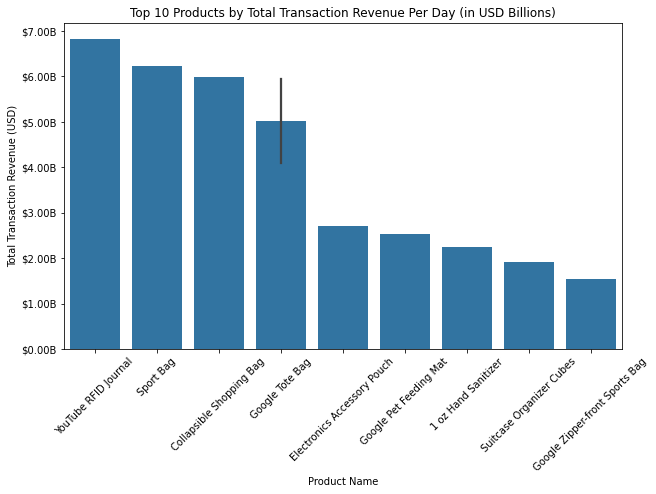

In [12]:
# Scenario 1: Identify Top 10 Products by Total Transaction Revenue Per Day (Keep Numeric for Plotting)
top_products_daily = data.groupby(['date', 'v2ProductName'])['totalTransactionRevenue'].sum().reset_index()

# Sort the products by total transaction revenue in descending order
top_products_daily = top_products_daily.sort_values(by='totalTransactionRevenue', ascending=False)

# Select the top 10 products
top_10_products_daily = top_products_daily.head(10)

# Plot the top 10 products (keeping numeric values for plotting)
plt.figure(figsize=(10, 6))
sns.barplot(x='v2ProductName', y='totalTransactionRevenue', data=top_10_products_daily)

# Format the y-axis values to display in USD billions
plt.gca().set_yticklabels([f'${x/1e9:.2f}B' for x in plt.gca().get_yticks()])

# Add titles and labels
plt.title('Top 10 Products by Total Transaction Revenue Per Day (in USD Billions)')
plt.xticks(rotation=45)
plt.ylabel('Total Transaction Revenue (USD)')
plt.xlabel('Product Name')

plt.show()


Anomalies (sharp increases or decreases) in Sport Bag transactions:
         date  transactions  pct_change
3  2016-08-05           1.0         inf
4  2016-08-06           0.0 -100.000000
5  2016-08-07           1.0         inf
7  2016-08-09           2.0  100.000000
11 2016-08-13           0.0 -100.000000
13 2016-08-15           2.0         inf
15 2016-08-17           0.0 -100.000000
16 2016-08-18           1.0         inf
17 2016-08-19           0.0 -100.000000
18 2016-08-20           1.0         inf
20 2016-08-22           3.0  200.000000
21 2016-08-23           1.0  -66.666667
22 2016-08-24           0.0 -100.000000
23 2016-08-25           6.0         inf
24 2016-08-26           0.0 -100.000000
28 2016-08-30           1.0         inf
29 2016-08-31           0.0 -100.000000
34 2016-09-05           2.0         inf
35 2016-09-06           0.0 -100.000000
45 2016-09-16           1.0         inf
46 2016-09-17           0.0 -100.000000
54 2016-09-26           1.0         inf
55 2016-09-2

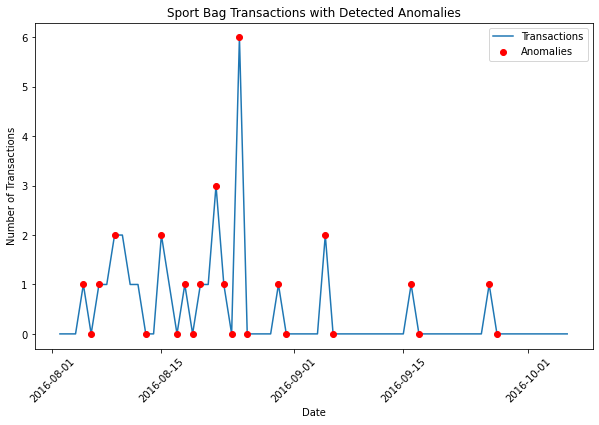

In [17]:
# Scenario 2: Detect anomalies for "Sport Bag" in the number of transactions

# Filter the data for the product "Sport Bag"
sport_bag_data = data[data['v2ProductName'] == 'Sport Bag']

# Group by date and sum the transactions per day
daily_sport_bag_transactions = sport_bag_data.groupby('date')['transactions'].sum().reset_index()

# Calculate the daily percentage change in the number of transactions
daily_sport_bag_transactions['pct_change'] = daily_sport_bag_transactions['transactions'].pct_change() * 100

# Define threshold for sharp increase/decrease (e.g., more than 50% change)
threshold_increase = 50  # 50% increase
threshold_decrease = -50  # 50% decrease

# Detect sharp increases or decreases in transactions
anomalies = daily_sport_bag_transactions[
    (daily_sport_bag_transactions['pct_change'] > threshold_increase) |
    (daily_sport_bag_transactions['pct_change'] < threshold_decrease)
]

# Display the detected anomalies
print("Anomalies (sharp increases or decreases) in Sport Bag transactions:")
print(anomalies)

# Plot the transactions and highlight anomalies
plt.figure(figsize=(10, 6))
plt.plot(daily_sport_bag_transactions['date'], daily_sport_bag_transactions['transactions'], label='Transactions')
plt.scatter(anomalies['date'], anomalies['transactions'], color='red', label='Anomalies', zorder=5)

# Add titles and labels
plt.title('Sport Bag Transactions with Detected Anomalies')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend()

plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_12884\2770360321.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'${x/1e9:.2f}B' for x in plt.gca().get_yticks()])


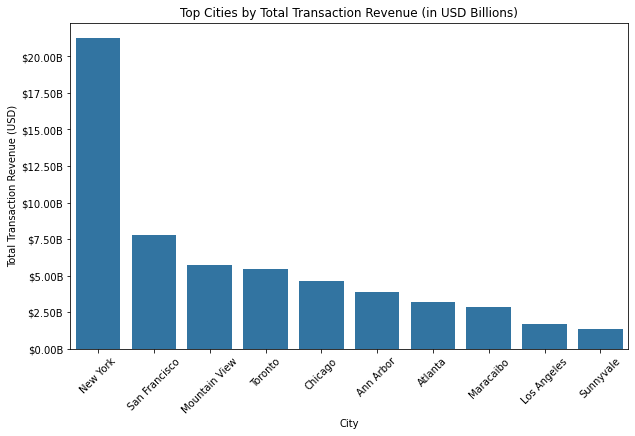

In [16]:
# Scenario 3: Identify the Most Profitable City by Total Transaction Revenue
city_revenue = data.groupby('city')['totalTransactionRevenue'].sum().reset_index()

# Sort the cities by total transaction revenue in descending order
city_revenue = city_revenue.sort_values(by='totalTransactionRevenue', ascending=False)

# Select cities ranked 2 to 11 (excluding the most profitable city)
top_cities_2_to_11 = city_revenue.iloc[1:11]

# Plot cities ranked 2 to 11 (keeping numeric values for plotting)
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='totalTransactionRevenue', data=top_cities_2_to_11)

# Format the y-axis values to display in USD billions
plt.gca().set_yticklabels([f'${x/1e9:.2f}B' for x in plt.gca().get_yticks()])

# Add titles and labels
plt.title('Top Cities by Total Transaction Revenue (in USD Billions)')
plt.xticks(rotation=45)
plt.ylabel('Total Transaction Revenue (USD)')
plt.xlabel('City')

plt.show()
